<a href="https://colab.research.google.com/github/stephenbeckr/time-series-class/blob/main/Code/QQPlots.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Testing for normality and Q-Q plots

To test data for normality, there are various hypothesis tests you can do (e.g., types of $\chi^2$ tests).  That's not the focus of this class so we won't go into them.

Instead, we'll introduce another tool to check, called the [**QQ Plot**](https://en.wikipedia.org/wiki/Q%E2%80%93Q_plot)

Visual tests and numerical hypothesis tests are *complementary*: any kind of test usually has a few disadvantages, and the disadvantages of visual tests and hypothesis tests are different.  Especially for small samples ($n\le 100$), where hypothesis tests may not have enough discriminating power, you can often spot things by eye. Furthermore, visual tests naturally must be taken with a grain of salt, which is a good thing. In contrast, hypothesis tests appear to be so formal that their results appear indisputable (which is usually not the case, as many assumptions go into them).

Tutorial by Stephen Becker, Jan 2022

## Intro
Below is the kind of QQ plot you are most likely to encounter: a normal QQ plot. Let's look at it and then discuss

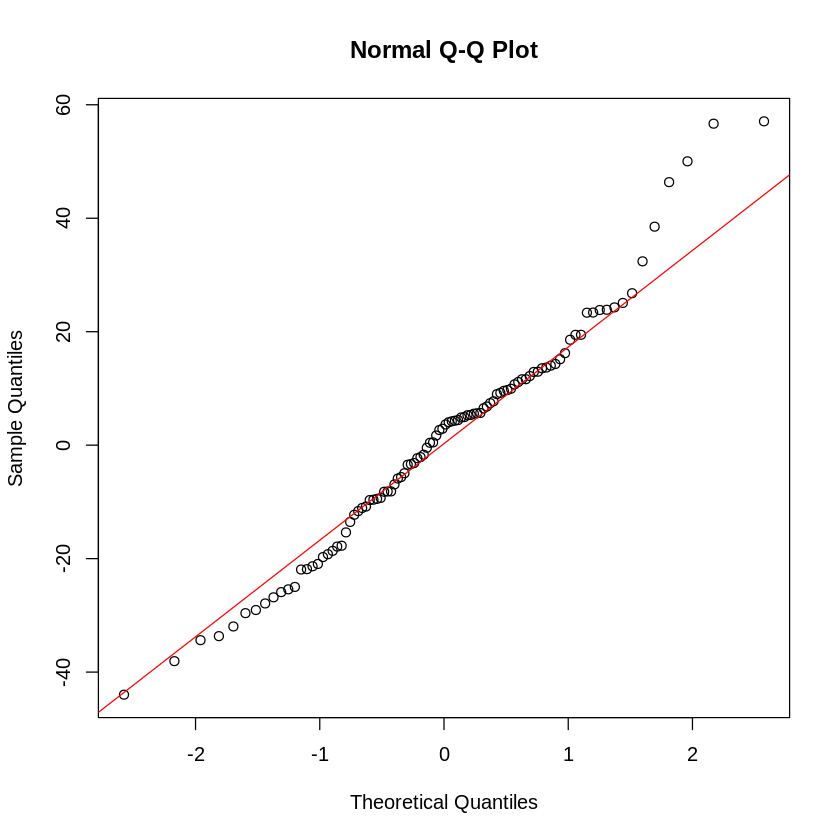

In [3]:
n <- 100
x <- rnorm( n, 2, 20 )
# Now the plots:
qqnorm(x)
# And add a line for reference:
qqline( x, col="red" )

Run the above cell several times and see how much it can change!

What are we looking for? The data should lie on a **straight line** if they really are generated from a normal distribution (they were).

### How does a QQ plot work?
We have two distributions, say $X \sim F_X$ and $Y \sim F_Y$.

We pick a list of **quantiles** $\{q_i\}$, and then we plot the points
$$
\{ (F_X^{-1}(q_i), F_Y^{-1}(q_i) \}
$$

If $F_X = F_Y$ then obviously these should lie on a straight line.  If $F_X$ and $F_Y$ are not the same but are of the same *type* and just have different mean and variance, then we get a straight line that doesn't go through the origin -- still easy to detect by hand.

In practice, usually one of the distributions is **empirical** (usually $Y$) and the other **theoretical** (usually $X$). So for a Gaussian QQ plot, the $F_X$ is assumed to be Gaussian, for which $F_X^{-1}$ is easy to calculate.

For the empirical one $Y$, we don't have $F_Y$ in mathematical form, but we can build it from the data. We sort realizations $\{y_i\}$ (giving us order statistics).  If we have $n$ data points, this let's us set $F_Y^{-1}(q_i) = y^\text{sorted}_i$ for $n$ quantiles, $q_i = \frac{i-.5}{n}$.

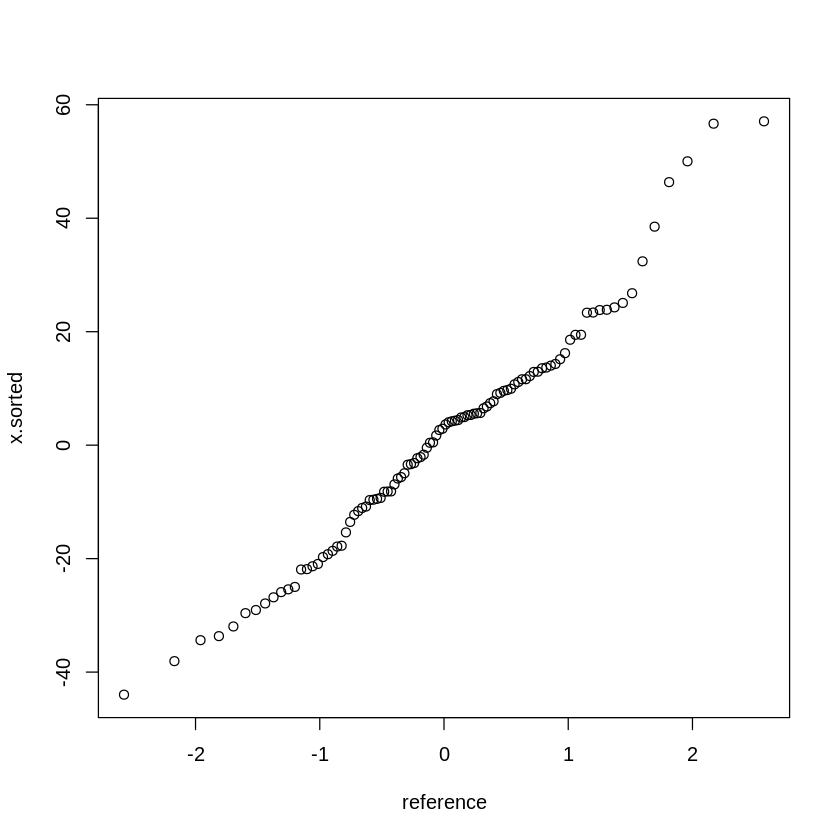

In [4]:
# Let's replicate "qqnorm"\
x.sorted = sort(x)
quantiles = (1:n)/n - 1/(2*n)
reference <- qnorm( quantiles ) # our "X-axis" plot
plot( reference, x.sorted )

## Using the test

How much deviation from a straight line should be tolerated? That's the art, and the best way is through practice.  We'll practice via a game below

## Game time

This game has a `trainingMode` where you just play once and it tells you if the data are normal or not, and then shows you some plots.  This is the recommended way to play in Colab.

When `trainingMode=FALSE` this function will show you the QQ plot and then you answer if you think the data are normal or not.  I recommend copying this into RStudio because it doesn't work in Colab (since it will prompt you *before* you see the plot!!)

In [10]:
playGame <- function( numGames = 5, trainingMode = TRUE) {
  if (trainingMode){
    numGames <- 1  # just do it once. You can repeatedly evaluate the fcn
  }
  numCorrect <- 0
  for (games in 1:numGames){ 
    n <- runif(1,10,200)
    typeRV <- runif(1,1,7)
    x <- switch(  
      typeRV,  
      rnorm( n, runif(1,-10,10), runif(1,.5,10) ),
      rchisq(n, df=runif(1,1,10)),
      rcauchy(n),
      rnorm( n, runif(1,-10,10), runif(1,.5,10) )^2,
      c(rnorm(n,0,1),rnorm(n,1,1)), # mixture
      c(rnorm(n,0,1),rnorm(n,0,.05)),
      rlnorm(n),
      rt(n,df=runif(1,1,10)),
      runif(n)
    )
    name <- switch(
      typeRV,
      'normal',
      'chi^2',
      'Cauchy',
      'square of a normal',
      'mixture of two offset normals',
      'mixture of two normals',
      'log-normal',
      'student t',
      'uniform'
    )  

    if (!trainingMode){
      qqnorm(x)
      qqline( x, col="red" )
      #plot.new()
      guess <- as.logical(toupper(readline("Normal? T/F > "))) # either T or TRUE, or F or FALSE
      correct <- FALSE
      if (typeRV == 1){
        if (guess){
          correct <- TRUE
        }
      } else if (!guess){
          correct <- TRUE
      }
      if (correct){
        print("Nice job; you were right.")
        numCorrect <- numCorrect + 1
      } else {
        print("... sorry, incorrect.")
      }
    } else {
      options(repr.plot.width = 14,repr.plot.height = 7)
      par(mfrow=c(1,2))
      qqnorm(x)
      qqline( x, col="red" )
    
      hist(x,freq=FALSE)
      lines(density(x),col="red")
    }
    cat(sprintf("The true distribution is %s\n", name))
  }
  if (!trainingMode){
    cat(sprintf("Game finished. You had %d of %d correct\n\n",numCorrect,numGames))
  }
}


The true distribution is square of a normal


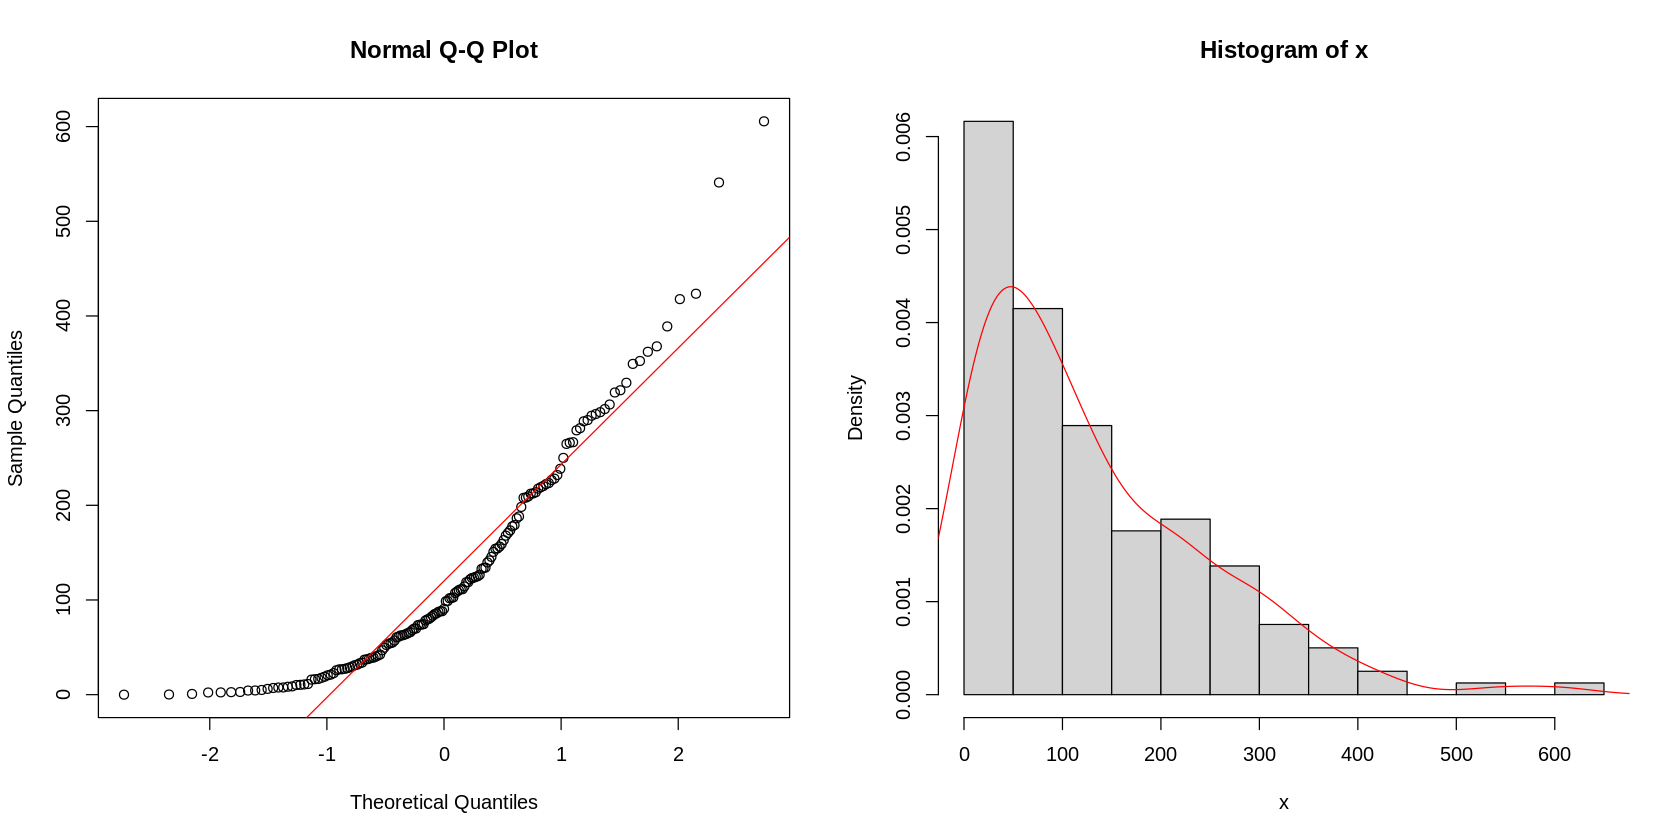

In [12]:
playGame() # trainingMode by default